In [1]:
# Loading the Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Loading the dataset
data = pd.read_csv('UniversalBank.csv',delimiter=";")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Seperating the features and labels
x = data.iloc[:,1:-1] # 1t for rows and second for columns
y = data.iloc[:,-1]
x.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,25,1,49,91107,4,1.6,1,0,0,1,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0


In [4]:
# Normalizing the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)

In [5]:
# Applying the Kmeans clustering for two clusters
kmeans = KMeans(2)
kmeans.fit(scaled_features)

KMeans(n_clusters=2)

In [6]:
# Making the prediction from the kmean model
identified_clusters = kmeans.fit_predict(scaled_features)

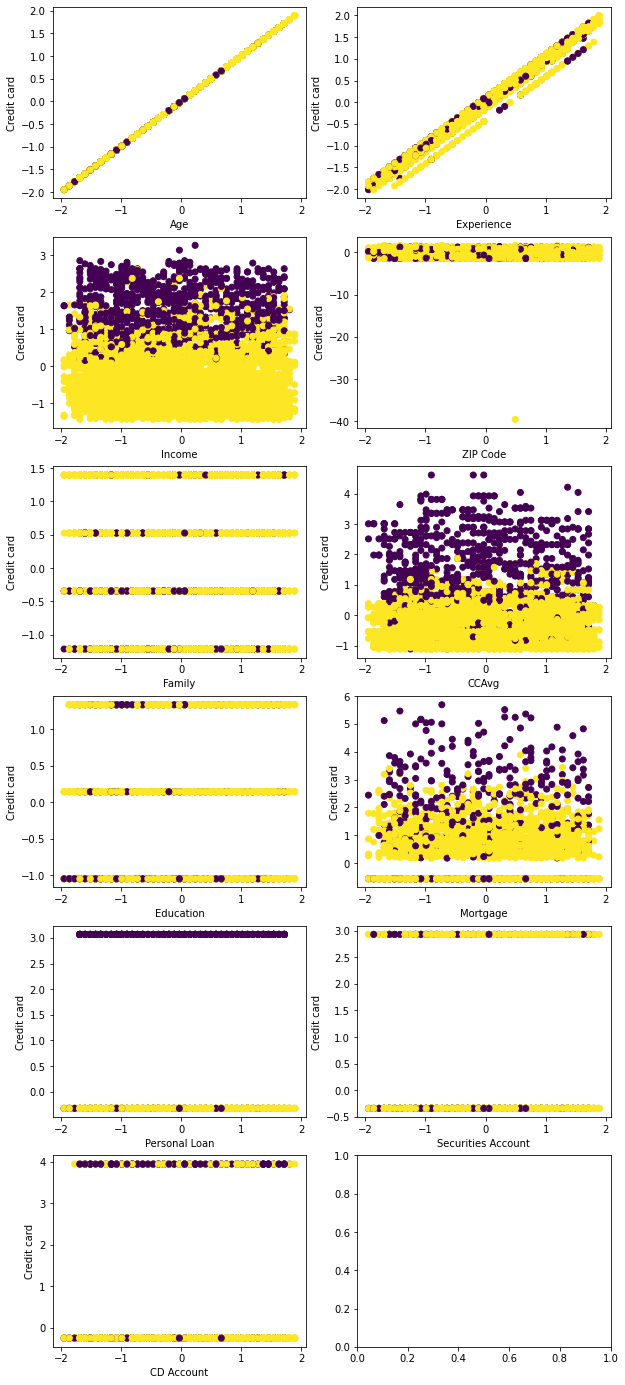

In [7]:
# Clusters for each attributes
plt.figure(figsize = (10,50))

# Display the clusters
for i in range(len(scaled_features)):
    plt.subplot(12,2, i+1)
    if i == 11:
        break
        
    plt.scatter(scaled_features[:,0], scaled_features[:,i], c = identified_clusters)
    plt.xlabel(x.columns[i])
    plt.ylabel("Credit card")

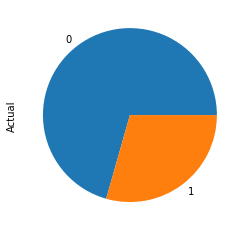

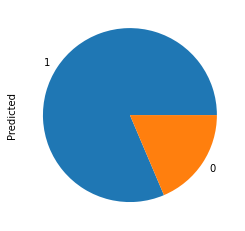

In [8]:
# Actual and predicted values comparisons
result = pd.DataFrame()
result['Actual'] = y
result['Predicted'] = identified_clusters
for col in result.columns:
    result[col].value_counts().plot(kind = 'pie')
    plt.show()

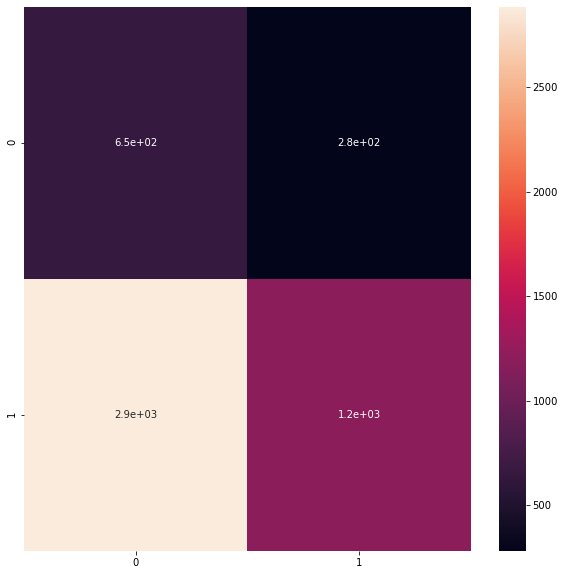

In [9]:
# Confusion matrx for actual and predicted values comparisons
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(identified_clusters, y), annot= True)

In [10]:
# Here is the classification report for the actual and predicted data
print(classification_report(identified_clusters, y))

              precision    recall  f1-score   support

           0       0.18      0.70      0.29       930
           1       0.81      0.29      0.43      4070

    accuracy                           0.37      5000
   macro avg       0.50      0.49      0.36      5000
weighted avg       0.69      0.37      0.40      5000

